<a href="https://colab.research.google.com/github/YungChuanLo/disease_prediction/blob/main/disease_prediction_code_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>[1.Decision Tree(Baseline)](#scrollTo=UxWWD6Px3PEv)

>>[2.SVM](#scrollTo=7Gxofq3W3aUz)

>>[3.Neural Network (MLP)](#scrollTo=h4x7Gkob3ihL)

>>[4.BNB](#scrollTo=fb0HjGVdKOPJ)

>>[5.BNB with feature set 2](#scrollTo=Q63jrAgqKcbl)

>>[6.Logistic Regression](#scrollTo=DvuSs2zpK7Nh)

>>[7.Random Forest](#scrollTo=BBRGGzhpdExb)

>>[8.KNN](#scrollTo=bgjd8Wp7dsIG)

>>[9.AdaBoost](#scrollTo=fm0r5OjL5J1g)

>>[10.Gradient Boosting](#scrollTo=-IU2WEQvdw7s)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/CS460/archive/Training.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CS460/archive/Testing.csv')

In [ ]:
df_train = df_train.drop(columns = 'Unnamed: 133')

In [ ]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
df_train.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [ ]:
df_train.duplicated(keep = 'first').sum()

4616

In [ ]:
duplicates = df_train.loc[df_train.duplicated(),:]

In [ ]:
duplicates

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [ ]:
df_train_without_duplicates = df_train.drop_duplicates()
df_train_without_duplicates

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [ ]:
df_train_without_duplicates['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
df_train_without_duplicates['prognosis'].nunique()

41

In [ ]:
df_train['prognosis'].value_counts()

,count
prognosis,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


In [ ]:
df_train_without_duplicates['prognosis'].value_counts()

,count
prognosis,
Hepatitis D,10
Dengue,10
Chicken pox,10
Migraine,10
Hepatitis B,9
Hypoglycemia,9
Common Cold,9
Tuberculosis,9
Hepatitis E,9


In [ ]:
df_train_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 407
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 318.2+ KB


In [ ]:
i = 0
for colname in df_train.columns:
    print(f'column no {i} -> {colname}: {df_train_without_duplicates[colname].unique()}')
    i+=1

column no 0 -> itching: [1 0]
column no 1 -> skin_rash: [1 0]
column no 2 -> nodal_skin_eruptions: [1 0]
column no 3 -> continuous_sneezing: [0 1]
column no 4 -> shivering: [0 1]
column no 5 -> chills: [0 1]
column no 6 -> joint_pain: [0 1]
column no 7 -> stomach_pain: [0 1]
column no 8 -> acidity: [0 1]
column no 9 -> ulcers_on_tongue: [0 1]
column no 10 -> muscle_wasting: [0 1]
column no 11 -> vomiting: [0 1]
column no 12 -> burning_micturition: [0 1]
column no 13 -> spotting_ urination: [0 1]
column no 14 -> fatigue: [0 1]
column no 15 -> weight_gain: [0 1]
column no 16 -> anxiety: [0 1]
column no 17 -> cold_hands_and_feets: [0 1]
column no 18 -> mood_swings: [0 1]
column no 19 -> weight_loss: [0 1]
column no 20 -> restlessness: [0 1]
column no 21 -> lethargy: [0 1]
column no 22 -> patches_in_throat: [0 1]
column no 23 -> irregular_sugar_level: [0 1]
column no 24 -> cough: [0 1]
column no 25 -> high_fever: [0 1]
column no 26 -> sunken_eyes: [0 1]
column no 27 -> breathlessness: [0 1

In [ ]:
df_train_without_duplicates['fluid_overload'].unique()

array([0])

In [ ]:
df_train_without_duplicates.drop(columns = 'fluid_overload',inplace = True)

<ipython-input-18-e68cd1dda6a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_without_duplicates.drop(columns = 'fluid_overload',inplace = True)


In [ ]:
# for NN training
df_train_without_duplicates_encoded = pd.get_dummies(df_train_without_duplicates)
df_train_without_duplicates_encoded

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
0,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
403,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
405,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
406,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Label Encoding
X = df_train_without_duplicates.copy()
X['prognosis'],_ = X['prognosis'].factorize()
X['prognosis'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [ ]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,40
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,40
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,40
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,40


In [ ]:
from sklearn.feature_selection import mutual_info_classif
y = X.pop('prognosis')


In [ ]:
mi_scores = mutual_info_classif(X,y)
mi_scores = pd.Series(mi_scores, index = X.columns, name = 'MI scores')


In [ ]:
mi_scores = mi_scores.sort_values(ascending = False)

In [ ]:
mi_scores

,MI scores
fatigue,0.775279
vomiting,0.765046
loss_of_appetite,0.728859
nausea,0.639389
headache,0.637193
...,...
nodal_skin_eruptions,0.030895
extra_marital_contacts,0.027363
bladder_discomfort,0.021602
yellow_crust_ooze,0.017819


In [ ]:

feature_set1 = mi_scores.loc[mi_scores >= 0.5].index
feature_set1

Index(['fatigue', 'vomiting', 'loss_of_appetite', 'nausea', 'headache',
       'high_fever', 'skin_rash', 'yellowish_skin', 'yellowing_of_eyes',
       'chest_pain', 'abdominal_pain'],
      dtype='object')

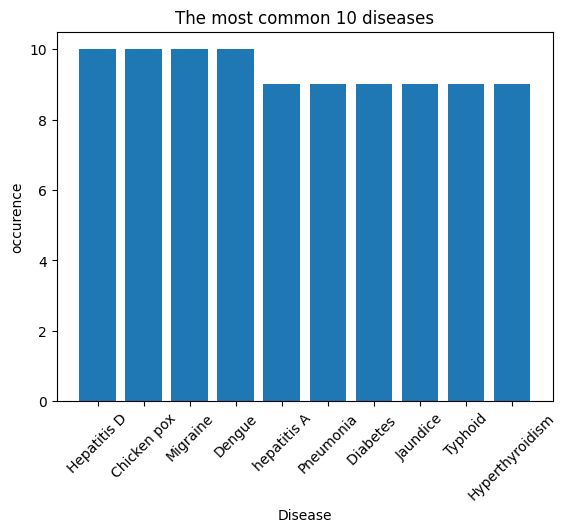

In [ ]:

top_10_values = df_train_without_duplicates['prognosis'].value_counts().sort_values(ascending = False)[:10].values
top_10_index = df_train_without_duplicates['prognosis'].value_counts().sort_values(ascending = False).index.unique()[:10]
plt.bar(x = top_10_index, height = top_10_values)
plt.xticks(rotation = 45)
plt.title('The most common 10 diseases')
plt.xlabel('Disease')
plt.ylabel('occurence')
plt.show()

In [ ]:
df_test.drop(columns = 'fluid_overload', inplace = True)

In [ ]:
X_test = df_test.copy()
y_test = X_test.pop('prognosis')
y_test,_ = y_test.factorize()

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train = X
y_train = y

smote = SMOTE(k_neighbors = 3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

##1.Decision Tree(Baseline)

Performance Metrics for Decision Tree:
Accuracy: 0.2857142857142857
Precision: 0.24107142857142858
Recall: 0.2857142857142857
F1 Score: 0.2436974789915966

Classification Report:
               precision    recall  f1-score   support

           0       0.06      1.00      0.12         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

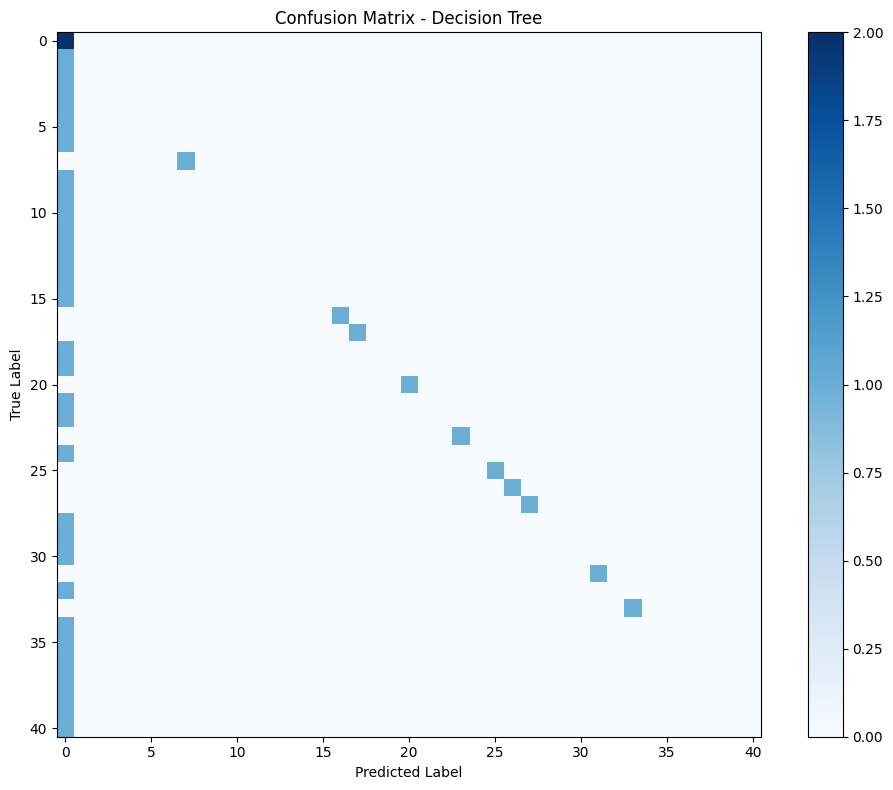

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.tree import DecisionTreeClassifier


def run_decision_tree(X_train, y_train, X_test, y_test):
    dt_classifier = DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=2,
        random_state=42
    )
    dt_classifier.fit(X_train, y_train)


    y_pred_dt = dt_classifier.predict(X_test)


    evaluate_model(y_test, y_pred_dt, "Decision Tree")

    return dt_classifier

dt_model = run_decision_tree(X_train_resampled, y_train_resampled, X_test, y_test)


##2.SVM

Performance Metrics for Support Vector Machine:
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 Score: 0.976190476190476

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
  

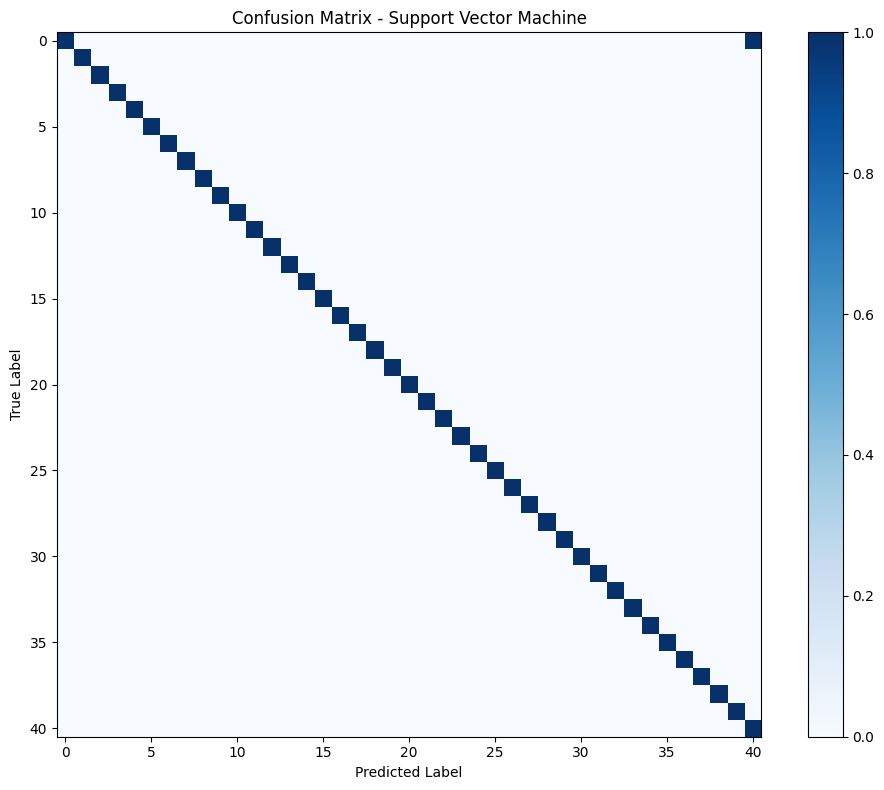

In [ ]:
from sklearn.svm import SVC


def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))


    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


def run_svm_classifier(X_train, y_train, X_test, y_test):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
    svm_classifier.fit(X_train_scaled, y_train)


    y_pred_svm = svm_classifier.predict(X_test_scaled)

    evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

    return svm_classifier


svm_model = run_svm_classifier(X_train_resampled, y_train_resampled, X_test, y_test)

##3.Neural Network (MLP)

Performance Metrics for Neural Network (MLP):
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 Score: 0.976190476190476

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
    

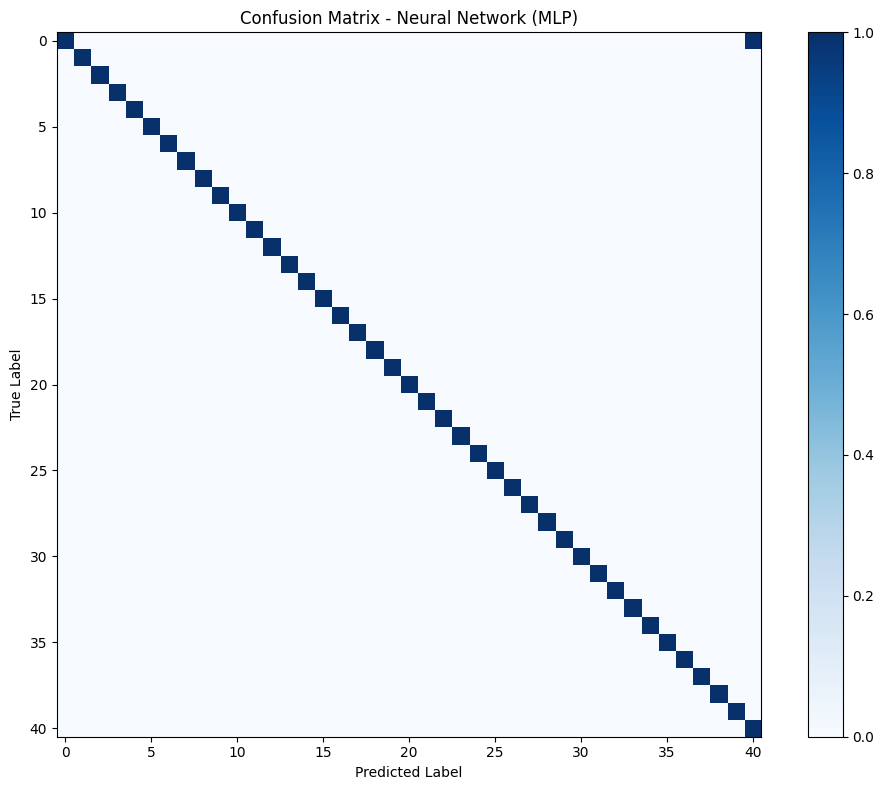

In [ ]:
from sklearn.neural_network import MLPClassifier


def run_neural_network(X_train, y_train, X_test, y_test):

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    mlp_classifier = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=300,
        activation='relu',
        solver='adam',
        random_state=42
    )
    mlp_classifier.fit(X_train_scaled, y_train)


    y_pred_mlp = mlp_classifier.predict(X_test_scaled)


    evaluate_model(y_test, y_pred_mlp, "Neural Network (MLP)")

    return mlp_classifier


mlp_model = run_neural_network(X_train_resampled, y_train_resampled, X_test, y_test)


##4.BNB

In [ ]:
BNB = BernoulliNB()


In [ ]:
# with normal imbalanced data
BNB.fit(X_train,y_train)

BernoulliNB()

In [ ]:
y_pred = BNB.predict(X_test)

In [ ]:
# total precision, recall, f1 score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.9881
Recall: 0.9762
F1 Score: 0.9762
Accuracy: 0.9762


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
# precision, recall, f1 score of each class

precision = precision_score(y_test, y_pred, average=None )
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred,average=None)
accuracy = accuracy_score(y_test, y_pred)

precision_scores = pd.Series(precision, index = df_train['prognosis'].unique(), name = 'precision_scores')
recall_scores = pd.Series(recall, index = df_train['prognosis'].unique(), name = 'recall_scores')
f1_scores = pd.Series(f1, index = df_train['prognosis'].unique(), name = 'F1_scores')
precision_scores

,precision_scores
Fungal infection,1.0
Allergy,1.0
GERD,1.0
Chronic cholestasis,1.0
Drug Reaction,0.5
Peptic ulcer diseae,1.0
AIDS,1.0
Diabetes,1.0
Gastroenteritis,1.0
Bronchial Asthma,1.0


In [ ]:
# with upsampled data
BNB.fit(X_train_resampled,y_train_resampled)

BernoulliNB()

In [ ]:
y_pred = BNB.predict(X_test)

In [ ]:
# total precision, recall, f1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Accuracy: 1.0000


In [ ]:
# precision, recall, f1 score of each class
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred, average=None )
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred,average=None)
accuracy = accuracy_score(y_test, y_pred)

precision_scores = pd.Series(precision, index = df_train['prognosis'].unique(), name = 'precision_scores')
recall_scores = pd.Series(recall, index = df_train['prognosis'].unique(), name = 'recall_scores')
f1_scores = pd.Series(f1, index = df_train['prognosis'].unique(), name = 'F1_scores')
precision_scores

,precision_scores
Fungal infection,1.0
Allergy,1.0
GERD,1.0
Chronic cholestasis,1.0
Drug Reaction,1.0
Peptic ulcer diseae,1.0
AIDS,1.0
Diabetes,1.0
Gastroenteritis,1.0
Bronchial Asthma,1.0


2. BNB with feature set

In [ ]:
#Bernoulli Naive Bayes with feature_set1

X_train = X[list(feature_set1)]
y_train = y


In [ ]:
X_test = df_test.copy()
X_test = X_test[list(feature_set1)]


In [ ]:
BNB.fit(X_train,y_train)
y_pred = BNB.predict(X_test)

In [ ]:
# total precision, recall, f1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.5861
Recall: 0.6667
F1 Score: 0.6036
Accuracy: 0.6667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##5.BNB with feature set 2

In [ ]:
# first trial set with mi_score >= 0.2
feature_set2 = mi_scores.loc[mi_scores >= 0.2].index
feature_set2

Index(['fatigue', 'vomiting', 'loss_of_appetite', 'nausea', 'headache',
       'high_fever', 'skin_rash', 'yellowish_skin', 'yellowing_of_eyes',
       'chest_pain', 'abdominal_pain', 'cough', 'malaise', 'itching',
       'joint_pain', 'chills', 'sweating', 'diarrhoea', 'breathlessness',
       'dark_urine', 'lethargy', 'muscle_pain', 'excessive_hunger',
       'weight_loss', 'loss_of_balance', 'irritability', 'swelled_lymph_nodes',
       'mild_fever', 'dizziness', 'acidity', 'phlegm',
       'blurred_and_distorted_vision', 'constipation', 'red_spots_over_body',
       'fast_heart_rate', 'abnormal_menstruation', 'stomach_pain',
       'painful_walking', 'cold_hands_and_feets', 'family_history',
       'neck_pain', 'restlessness', 'obesity'],
      dtype='object')

In [ ]:
X_train = X[list(feature_set2)]
y_train = y


In [ ]:
X_test = df_test.copy()
X_test = X_test[list(feature_set2)]


In [ ]:
BNB.fit(X_train,y_train)
y_pred = BNB.predict(X_test)

In [ ]:
# total precision, recall, f1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.9643
Recall: 0.9762
F1 Score: 0.9683
Accuracy: 0.9762


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##6.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', C = 0.025)
logreg_balanced = LogisticRegression(multi_class='multinomial', solver='saga', class_weight = 'balanced', C = 0.005)


In [ ]:
X_train = df_train_without_duplicates.copy()
y_train = X_train.pop('prognosis')
X_test = df_test.copy()
y_test = X_test.pop('prognosis')

In [ ]:
logreg_multi.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.025, multi_class='multinomial')

In [ ]:
y_pred = logreg_multi.predict(X_test)

In [ ]:
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.6627
Recall: 0.7381
F1 Score: 0.6814
Accuracy: 0.7381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
logreg_balanced.fit(X_train,y_train)
y_pred = logreg_balanced.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.9881
Recall: 0.9762
F1 Score: 0.9762
Accuracy: 0.9762


##7.Random Forest

Performance Metrics for Random Forest:
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 Score: 0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          

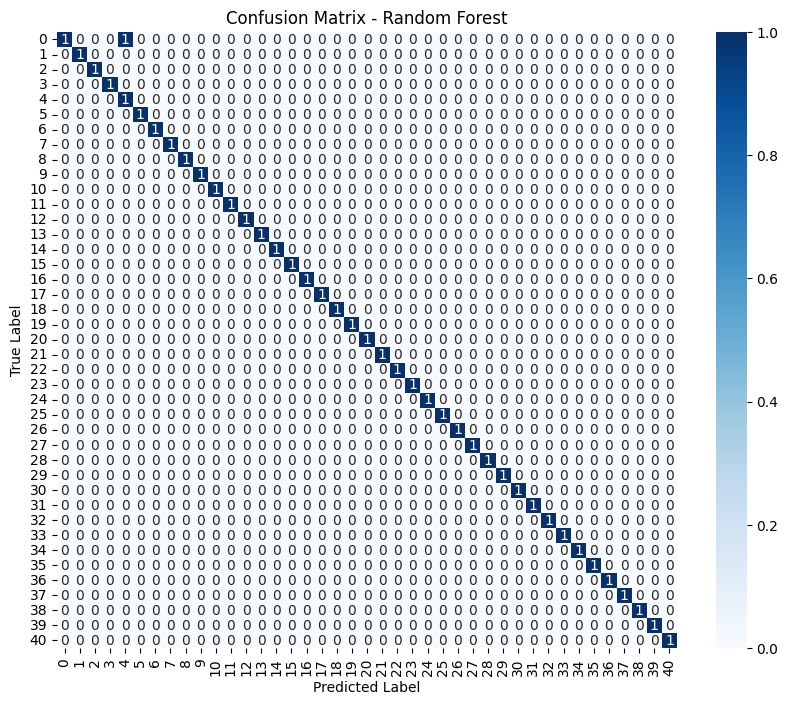

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Random Forest Classifier
def run_random_forest(X_train, y_train, X_test, y_test):
    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predictions
    y_pred_rf = rf_classifier.predict(X_test)

    # Evaluate
    evaluate_model(y_test, y_pred_rf, "Random Forest")

    return rf_classifier

# Run Random Forest Classifier
rf_model = run_random_forest(X_train_resampled, y_train_resampled, X_test, y_test)


##8.KNN

Performance Metrics for K-Nearest Neighbors (k=5):
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 Score: 0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         

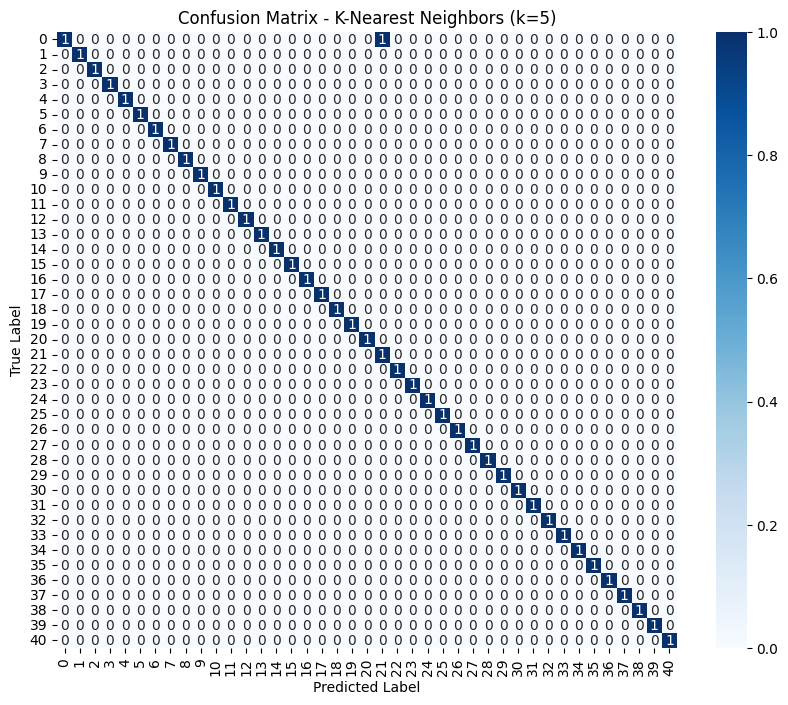

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

def run_knn_classifier(X_train, y_train, X_test, y_test, n_neighbors=5):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train_scaled, y_train)

    y_pred_knn = knn_classifier.predict(X_test_scaled)

    evaluate_model(y_test, y_pred_knn, f"K-Nearest Neighbors (k={n_neighbors})")

    return knn_classifier


knn_model = run_knn_classifier(X_train_resampled, y_train_resampled, X_test, y_test, n_neighbors=5)


##9.AdaBoost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performance Metrics for AdaBoost:
Accuracy: 0.2619047619047619
Precision: 0.23883928571428573
Recall: 0.2619047619047619
F1 Score: 0.23953823953823955

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.03      1.00      0.06         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14 

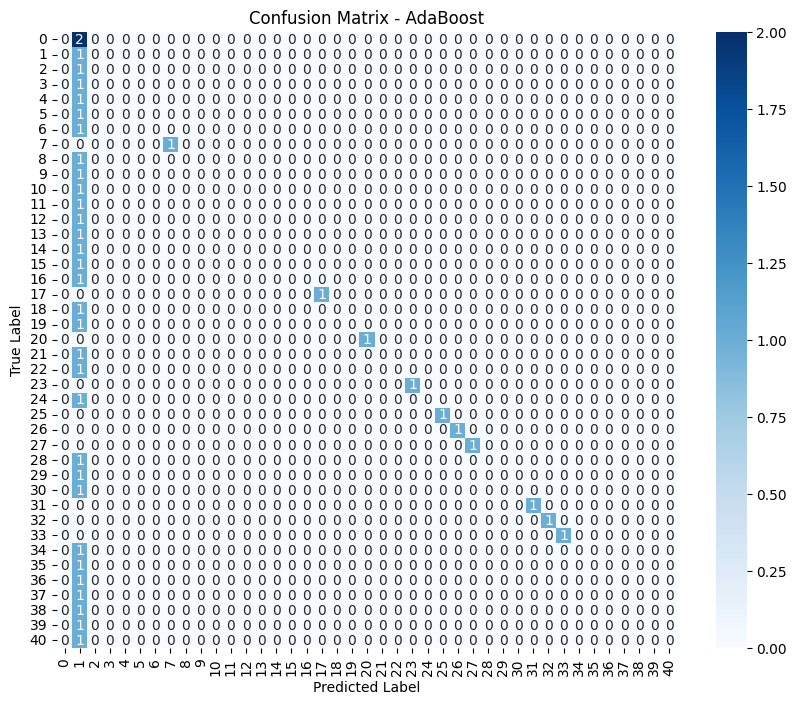

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

def run_adaboost_classifier(X_train, y_train, X_test, y_test, n_estimators=100):
    ada_classifier = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    ada_classifier.fit(X_train, y_train)

    y_pred_ada = ada_classifier.predict(X_test)

    evaluate_model(y_test, y_pred_ada, "AdaBoost")

    return ada_classifier

ada_model = run_adaboost_classifier(X_train_resampled, y_train_resampled, X_test, y_test)


##10.Gradient Boosting

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance Metrics for Gradient Boosting (XGBoost):
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 Score: 0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00       

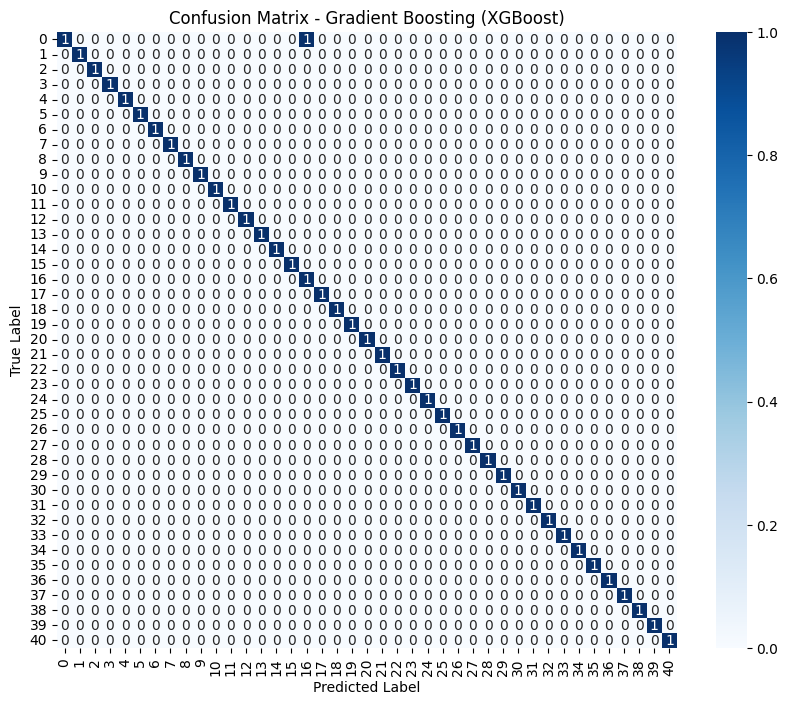

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

def run_gradient_boosting(X_train, y_train, X_test, y_test):
    gb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    gb_classifier.fit(X_train, y_train)

    y_pred_gb = gb_classifier.predict(X_test)

    evaluate_model(y_test, y_pred_gb, "Gradient Boosting (XGBoost)")

    return gb_classifier

gb_model = run_gradient_boosting(X_train_resampled, y_train_resampled, X_test, y_test)
